In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly

In [22]:
data= pd.read_csv('1718hourlyPrice_withZEC.csv')
data['time'] = pd.to_datetime(data['time'])
ws = 48 # window size
coins = ['BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'EOS', 'XMR', 'NEO', 'MIOTA', 'DASH', 'ETC', 'ZEC']
BBW = dict()
BBW['time'] = data.iloc[(np.arange(data.shape[0] - ws) + ws),0]
for coin in coins:
    price = data[coin]
    ws = 48 
    BBW_48h = []
    for i in range(len(price) - ws):
        window = price.iloc[i:(i+ws)]
        ma = window.mean()
        sd = window.std()

        upper = ma + sd * 2
        lower = ma - sd * 2
        middle = ma
        BBW_48h.append(((upper - lower) / middle))
    BBW[coin] = BBW_48h

# 'BTC','ETH', 'XRP', 'BCH', 'LTC', 'EOS', 'XMR', 'NEO', 'MIOTA', 'DASH', 'ETC', 'ZEC'
mktShare = [0.43635329, 0.15890567, 0.07639468, 0.05976894, 0.02171618,
               0.0123417 , 0.00957971, 0.01225733, 0.01285381, 0.01213426,
               0.0060474 , 0.00282648]

BBW = pd.DataFrame(BBW)
BBW['weighted BBW'] = BBW.iloc[:,1:] @ mktShare


In [25]:
# fig = go.Figure()
# for bbw in BBW.columns[2:-2]:
#     fig.add_trace(go.Scatter(x=BBW['time'], y=BBW[bbw], opacity = 0.1, name = bbw))
# fig.add_trace(go.Scatter(x=BBW['time'], y=BBW['BTC'], name = 'BTC'))
# fig.add_trace(go.Scatter(x=BBW['time'], y=BBW['weighted BBW'], name = 'weighted BBW'))

# fig.update_layout(title="Bollinger Bands Width")

# plotly.offline.plot(fig,filename="Bollinger Bands Width.html")

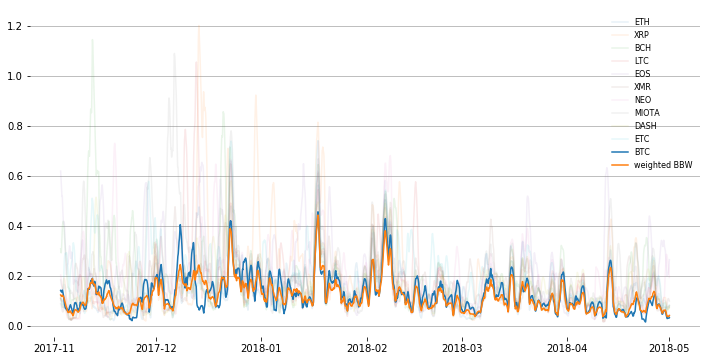

In [40]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
for bbw in BBW.columns[2:-2]:
    
    plt.plot(BBW.set_index(BBW.time)[bbw], alpha = 0.1, label = bbw)
plt.grid(axis='y')
plt.plot(BBW.set_index(BBW.time)['BTC'], label = 'BTC')
plt.plot(BBW.set_index(BBW.time)['weighted BBW'], label = 'weighted BBW')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.show
plt.savefig('Bollinger Bands Width.png',transparent=True)

In [24]:
BBW.to_csv('BBW.csv', index = False)

## Compare BTC BBW and BTC N_price

In [28]:
dataCompare = data[data['time'].isin(BBW.time)]
BBW['time'] = pd.to_datetime(BBW['time'])
BTC_norm = (dataCompare.BTC - dataCompare.BTC.min()) / (dataCompare.BTC.max() - dataCompare.BTC.min()) 

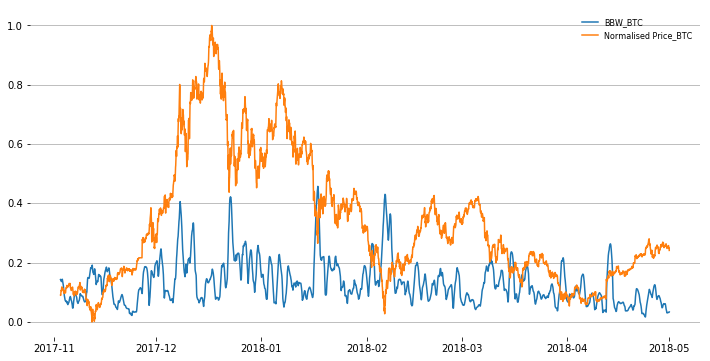

In [29]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)

plt.plot(BBW.set_index(pd.to_datetime(BBW.time))['BTC'], label = 'BBW_BTC')
plt.plot(dataCompare.time,BTC_norm.values,label= 'Normalised Price_BTC')
plt.grid(axis='y')
plt.legend
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.show
plt.savefig('BBW_BTC vs N_Price_BTC.png',transparent=True)

In [30]:
# import plotly
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=BBW.time, y=BBW['BTC'],name = 'BBW_BTC'))
# fig.add_trace(go.Scatter(x=BBW.time, y = BTC_norm, name =  'Nprice_BTC'))
# fig.update_layout(title="Bollinger Bands Width and Normalized BTC Price")
# plotly.offline.plot(fig,filename="BBW_BTC vs N_Price_BTC.html")